#Scene Recognition using CNN
I have implemented scene recognition of MIT 67 categories using CNN (resnet30 and then for resnet50). Fastai library is used for the implementation. 


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path

In [0]:
bs = 64

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
tfms = get_transforms(do_flip=False)


In [0]:
from pathlib import Path

In [0]:
path=Path('/content/drive/My Drive/ap').resolve()

In [11]:
path.ls()

[PosixPath('/content/drive/My Drive/ap/train'),
 PosixPath('/content/drive/My Drive/ap/labels_as.csv'),
 PosixPath('/content/drive/My Drive/ap/models')]

In [12]:
(path/'train').ls()

[PosixPath('/content/drive/My Drive/ap/train/buffet_80'),
 PosixPath('/content/drive/My Drive/ap/train/casino_80'),
 PosixPath('/content/drive/My Drive/ap/train/children_room'),
 PosixPath('/content/drive/My Drive/ap/train/airport_80'),
 PosixPath('/content/drive/My Drive/ap/train/art_studio_80'),
 PosixPath('/content/drive/My Drive/ap/train/Bakery'),
 PosixPath('/content/drive/My Drive/ap/train/bar_80'),
 PosixPath('/content/drive/My Drive/ap/train/bathroom_80'),
 PosixPath('/content/drive/My Drive/ap/train/bedroom'),
 PosixPath('/content/drive/My Drive/ap/train/bookstore_80'),
 PosixPath('/content/drive/My Drive/ap/train/bowling'),
 PosixPath('/content/drive/My Drive/ap/train/church_inside_80'),
 PosixPath('/content/drive/My Drive/ap/train/classroom'),
 PosixPath('/content/drive/My Drive/ap/train/cloister_80'),
 PosixPath('/content/drive/My Drive/ap/train/closet'),
 PosixPath('/content/drive/My Drive/ap/train/clothingstore_80'),
 PosixPath('/content/drive/My Drive/ap/train/computerro

In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct=0.1, size=224)

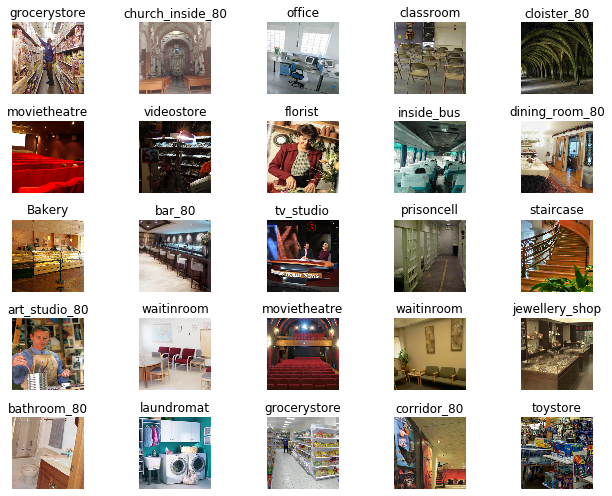

In [15]:
#lets print some of the data
data.show_batch(figsize=(9,7))

In [0]:
data

ImageDataBunch;

Train: LabelList (4752 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
buffet_80,buffet_80,buffet_80,buffet_80,buffet_80
Path: /content/drive/My Drive/ap;

Valid: LabelList (528 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
corridor_80,closet,art_studio_80,closet,kitchen
Path: /content/drive/My Drive/ap;

Test: None

In [0]:
data.c

66

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate] )

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [18]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.877923,1.679841,0.554924,0.445076,29:58
1,2.252941,1.271731,0.619318,0.380682,01:35
2,1.559689,1.110021,0.685606,0.314394,01:32
3,1.192344,1.082420,0.702652,0.297348,01:33


In [0]:
learn.save('stage-1')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

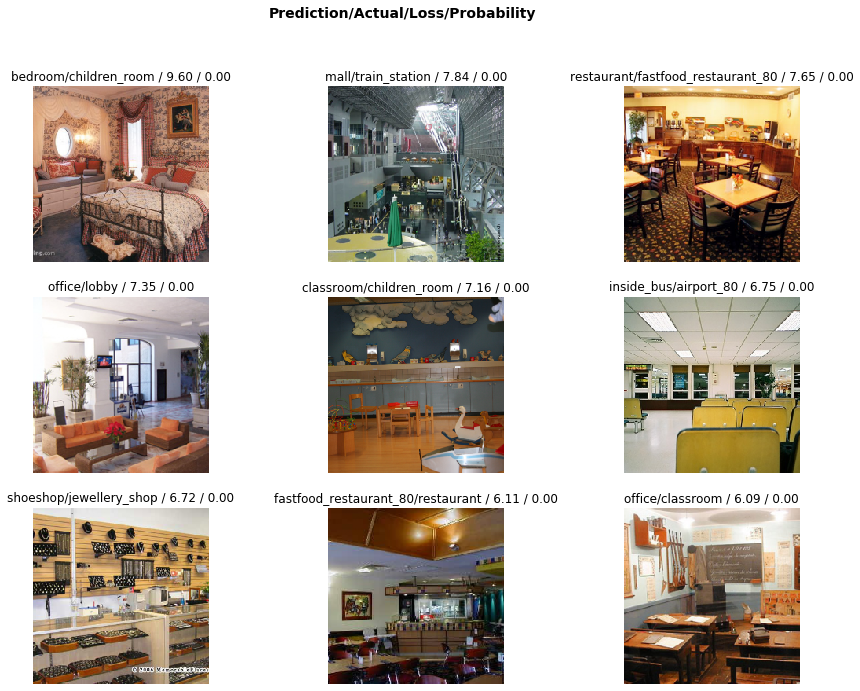

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

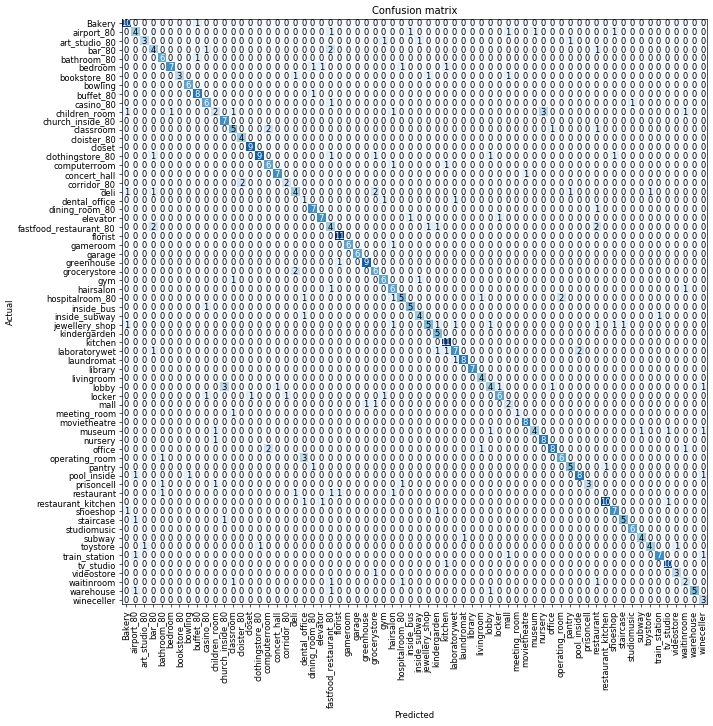

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
#printing the most confused categories
interp.most_confused(min_val=2)

[('children_room', 'nursery', 3),
 ('lobby', 'church_inside_80', 3),
 ('operating_room', 'dental_office', 3),
 ('bar_80', 'fastfood_restaurant_80', 2),
 ('classroom', 'computerroom', 2),
 ('corridor_80', 'cloister_80', 2),
 ('deli', 'grocerystore', 2),
 ('fastfood_restaurant_80', 'bar_80', 2),
 ('fastfood_restaurant_80', 'restaurant', 2),
 ('grocerystore', 'deli', 2),
 ('hospitalroom_80', 'operating_room', 2),
 ('laboratorywet', 'pool_inside', 2),
 ('office', 'computerroom', 2)]

Some of the categories inn which our classifier iss confused are actually similar. For eg: hospital room and operating, kindergarden and classroom, children room and kindergarden.

In [0]:
# unfreezing the layers 
learn.unfreeze()

In [26]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.567472,1.172126,0.638258,0.361742,01:35


In [0]:
learn.load('stage-1');

In [28]:
# Finging the optimum learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


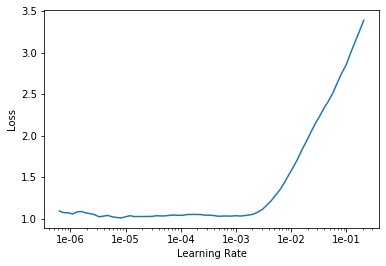

In [29]:
learn.recorder.plot()

In [30]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.143735,1.090345,0.698864,0.301136,01:35
1,1.444233,1.717927,0.611742,0.388258,01:35
2,1.345107,1.466926,0.630682,0.369318,01:35
3,0.949670,1.059852,0.715909,0.284091,01:38
4,0.612864,1.052776,0.723485,0.276515,01:36
5,0.360582,1.034407,0.723485,0.276515,01:36
6,0.215940,0.971972,0.751894,0.248106,01:36
7,0.157779,0.951156,0.753788,0.246212,01:40


When I train on unfreeze network, my classifier has improved with increase in number of epoch. At epoch=3 error_rate has reduced to 0.285985.

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, valid_pct=0.1, size=299, bs=bs//2)

In [32]:
#Using the pretrained weights for resnet50 to train
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate] )

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


Now I have used another model which is resnet50 for transfer learning.

In [33]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.423733,1.452528,0.594697,0.405303,02:21
1,1.562163,1.047993,0.681818,0.318182,02:15
2,1.065123,0.928306,0.744318,0.255682,02:16
3,0.693469,0.880723,0.742424,0.257576,02:15


In comparison with resnet30, my classifier so far works better on model resnet50. 

In [0]:
learn.save('stage-1-50')

In [0]:
#interp = ClassificationInterpretation.from_learner(learn)

#losses,idxs = interp.top_losses()

#len(data.valid_ds)==len(losses)==len(idxs)
#interp.plot_top_losses(9, figsize=(15,11))
#interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
#interp.most_confused(min_val=2)

In [0]:
#learn.unfreeze()
#learn.fit_one_cycle(1)

In [0]:
learn.load('stage-1-50');

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


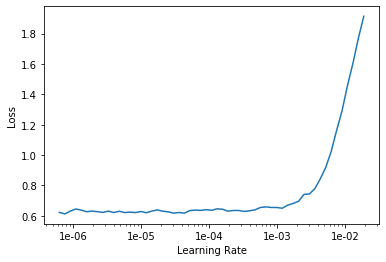

In [39]:
learn.lr_find()
#plotting loss versus learning rate
learn.recorder.plot()

In [40]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.898385,1.273117,0.653409,0.346591,02:27
1,1.746859,1.590912,0.615530,0.384470,02:26
2,1.443311,1.308170,0.695076,0.304924,02:27
3,0.892739,1.190223,0.710227,0.289773,02:30
4,0.545637,1.035909,0.763258,0.236742,02:30
5,0.321122,0.980392,0.782197,0.217803,02:27
6,0.150909,0.826002,0.801136,0.198864,02:27
7,0.109914,0.825593,0.810606,0.189394,02:26


Retraining the unfreezed model gives us better accuracy then freezed model. Also if we compare it with resent30 model we would see that at higher epoch resent50 has performed better as it gives higher accuracy. The reason is because resnet 50 is deeper than resent30 and has more parameters.

In [0]:
#learn.load('stage-1-50');

In [0]:
#interp = ClassificationInterpretation.from_learner(learn)

In [0]:
#interp.most_confused(min_val=2)

[('Bakery', 'restaurant_kitchen', 2),
 ('bathroom_80', 'kitchen', 2),
 ('bedroom', 'children_room', 2),
 ('grocerystore', 'deli', 2),
 ('kindergarden', 'children_room', 2),
 ('meeting_room', 'classroom', 2),
 ('museum', 'airport_80', 2),
 ('prisoncell', 'corridor_80', 2),
 ('tv_studio', 'studiomusic', 2),
 ('videostore', 'bookstore_80', 2)]

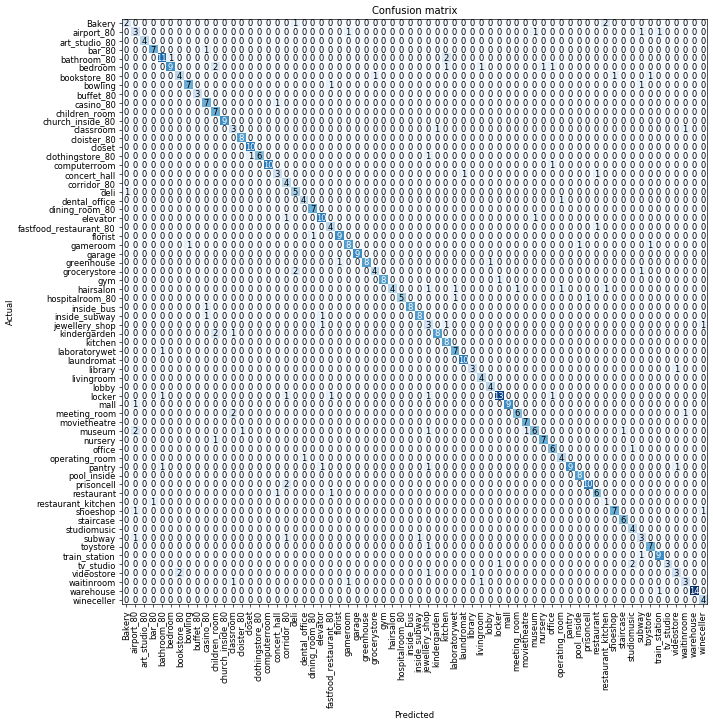

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

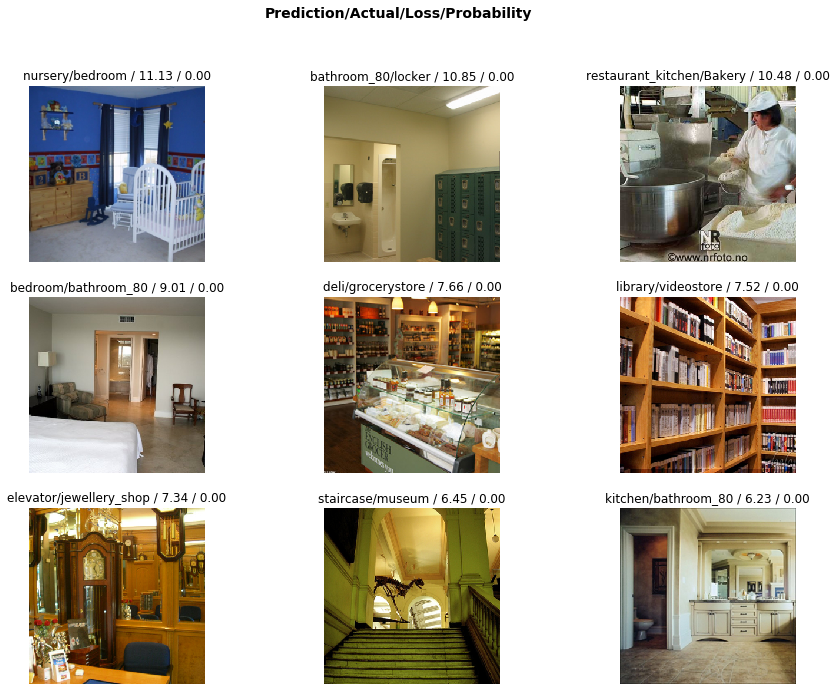

In [0]:
#interp.plot_top_losses(9, figsize=(15,11))